In [ ]:
import numpy as np  
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns 
import sklearn 

In [2]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

#Common Model Algorithms
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.svm import SVC
from xgboost import XGBClassifier

#Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sub = pd.read_csv('gender_submission.csv')

In [4]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [6]:
sub

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [7]:
train.info(),print('\n'), test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass

(None, None, None)

In [8]:
train.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [9]:
# for inverstgtion purpose I will combine both dataset
df = pd.concat([train, test], axis=0, ignore_index=True)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [10]:
data = train.copy(deep=True)
dataset = [data,test,df]          # Dataset List containing data(copy of train), test, df(concat of train and test)

In [11]:
for table in dataset:
    table['Title'] = table['Name'].str.split(", ",expand=True)[1].str.split(". ",expand=True)[0]
    table['Last Name'] = table['Name'].str.split(",", expand=True)[0]
    table['Family Size'] = table['SibSp'] + table['Parch'] + 1
    table['isAlone'] = table['Family Size'].apply(lambda x: 1 if x == 1 else 0)

In [12]:
for table in dataset:
    table.drop(['PassengerId','Ticket','Cabin'],axis=1,inplace=True)

In [13]:
print('Train dataset\n{}'.format(data.isnull().sum()))
print('\n   Test dataset\n{}'.format(test.isnull().sum()))

Train dataset
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
Title            0
Last Name        0
Family Size      0
isAlone          0
dtype: int64

   Test dataset
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            1
Embarked        0
Title           0
Last Name       0
Family Size     0
isAlone         0
dtype: int64


In [14]:
data[data['Embarked'].isnull() == True]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Last Name,Family Size,isAlone
61,1,1,"Icard, Miss. Amelie",female,38.0,0,0,80.0,NaN,Miss,Icard,1,1
829,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,80.0,NaN,Mrs,Stone,1,1


The two missing values have fare 80, pclass 1, cabin B28, same Ticket number. From countplot we see Embarked C is common around for Pclass 1 above Fare 60.

Since Embarked is categorical value, we will use mode (most frequent value)

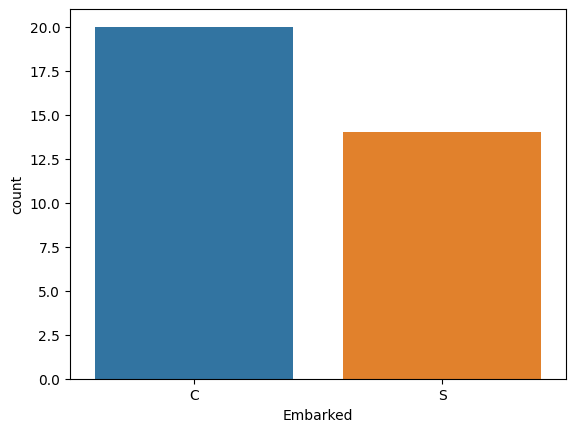

In [15]:
embark = df.loc[(df['Pclass']==1) & (df['Fare']>60) & (df['Sex']=='female') & (df['isAlone']==1)]
#t = df.loc[(df['Pclass']==1)]
sns.countplot(embark, x='Embarked');

In [16]:
# Fill Embarked in train copy dataset

data['Embarked'].fillna(embark['Embarked'].mode()[0], inplace=True)

In [17]:
test[test['Fare'].isnull() == True]

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Last Name,Family Size,isAlone
152,3,"Storey, Mr. Thomas",male,60.5,0,0,NaN,S,Mr,Storey,1,1


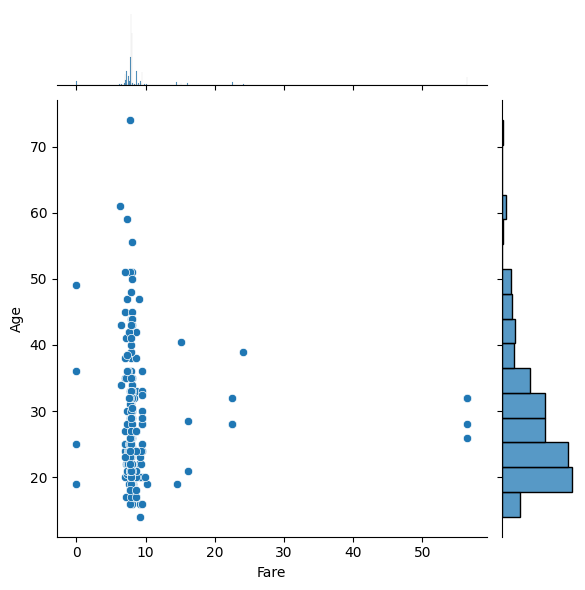

In [18]:
fare = df[(df['Pclass']==3) & (df['Sex']=='male') & (df['Embarked']=='S') & (df['isAlone']==1)]

sns.jointplot(data=fare, x='Fare', y='Age')

In [19]:
fare['Fare'].median(), df['Fare'].median() # compare to no condition

(7.8958, 14.4542)

In [20]:
# Filling value

test['Fare'].fillna(fare['Fare'].median(),inplace=True)

In [21]:
df.loc[df['Age'].isnull()].Title.value_counts()

Title
Mr        176
Miss       50
Mrs        27
Master      8
Dr          1
Ms          1
Name: count, dtype: int64

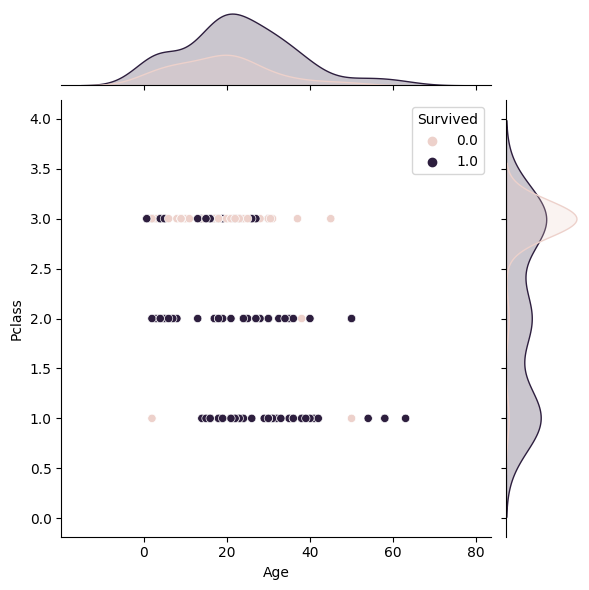

In [22]:
f = df.loc[(df['Title']=='Miss')]
sns.jointplot(f, x='Age', y='Pclass', hue='Survived')

mr1_age = df.loc[(df['Title'] == 'Miss') & (df['Pclass'] == 1), 'Age'].mean()
mr2_age = df.loc[(df['Title'] == 'Miss') & (df['Pclass'] == 2), 'Age'].mean()
mr3_age = df.loc[(df['Title'] == 'Miss') & (df['Pclass'] == 3), 'Age'].mean()

# Filling Values

for table in dataset:
    table['Age'] = table['Age'].mask((table['Title'] == 'Miss') & (table['Pclass'] == 1) & table['Age'].isnull(), mr1_age)
    table['Age'] = table['Age'].mask((table['Title'] == 'Miss') & (table['Pclass'] == 2) & table['Age'].isnull(), mr2_age)
    table['Age'] = table['Age'].mask((table['Title'] == 'Miss') & (table['Pclass'] == 3) & table['Age'].isnull(), mr3_age)

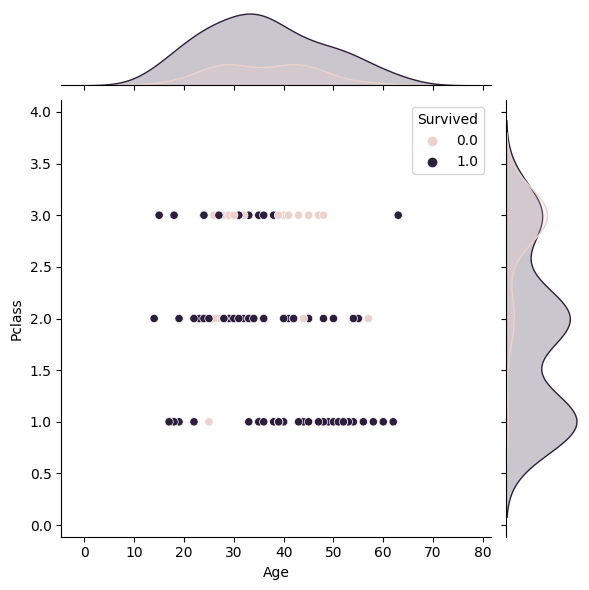

In [23]:
f = df.loc[(df['Title']=='Mrs')]
sns.jointplot(f, x='Age', y='Pclass', hue='Survived')

mr1_age = df.loc[(df['Title'] == 'Mrs') & (df['Pclass'] == 1), 'Age'].mean()
mr2_age = df.loc[(df['Title'] == 'Mrs') & (df['Pclass'] == 2), 'Age'].mean()
mr3_age = df.loc[(df['Title'] == 'Mrs') & (df['Pclass'] == 3), 'Age'].mean()

# Filling value

for table in dataset:
    table['Age'] = table['Age'].mask((table['Title'] == 'Mrs') & (table['Pclass'] == 1) & table['Age'].isnull(), mr1_age)
    table['Age'] = table['Age'].mask((table['Title'] == 'Mrs') & (table['Pclass'] == 2) & table['Age'].isnull(), mr2_age)
    table['Age'] = table['Age'].mask((table['Title'] == 'Mrs') & (table['Pclass'] == 3) & table['Age'].isnull(), mr3_age)

In [24]:
mr1_age = df.loc[(df['Title'] == 'Mr') & (df['Pclass'] == 1), 'Age'].mean()
mr2_age = df.loc[(df['Title'] == 'Mr') & (df['Pclass'] == 2), 'Age'].mean()
mr3_age = df.loc[(df['Title'] == 'Mr') & (df['Pclass'] == 3), 'Age'].mean()

# filling values

for table in dataset:
    table['Age'] = table['Age'].mask((table['Title'] == 'Mr') & (table['Pclass'] == 1) & table['Age'].isnull(), mr1_age)
    table['Age'] = table['Age'].mask((table['Title'] == 'Mr') & (table['Pclass'] == 2) & table['Age'].isnull(), mr2_age)
    table['Age'] = table['Age'].mask((table['Title'] == 'Mr') & (table['Pclass'] == 3) & table['Age'].isnull(), mr3_age)

In [25]:
Ms_age = df.loc[df['Title']=='Ms'].Age.mean()

# filling values

for table in dataset:
    table['Age'] = table['Age'].mask((table['Title'] == 'Ms') & table['Age'].isnull(), Ms_age)

In [26]:
Dr_age = df.loc[(df['Title']=='Dr') & (df['Sex']=='male') & (df['Pclass']==1)].Age.mean()

# Filling value

for table in dataset:
    table['Age'] = table['Age'].mask((table['Title'] == 'Dr') & table['Age'].isnull(), Dr_age)

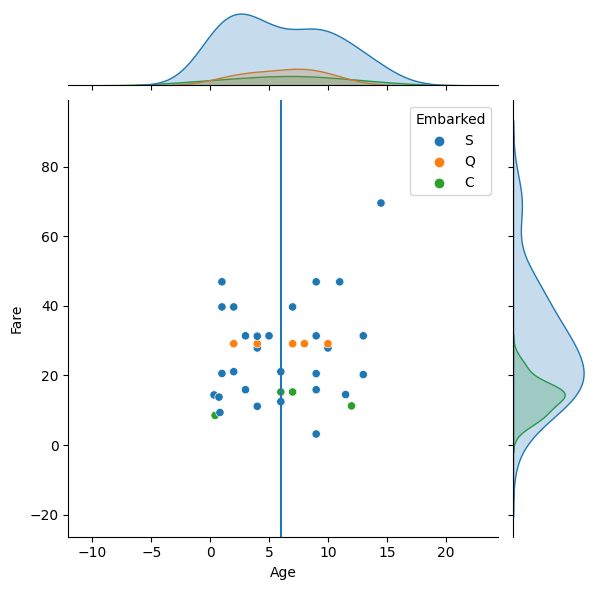

In [27]:
master_null_df = df.loc[(df['Age'].isnull()) & (df['Title']=='Master')]

master_age_df = df.loc[(df['Title']=='Master') & (df['Pclass']==3)]

sns.jointplot(master_age_df, x='Age', hue='Embarked', y='Fare')
plt.axvline(x=master_age_df['Age'].median());

# Filling value

for table in dataset:
    table['Age'] = table['Age'].mask((table['Title'] == 'Master') & table['Age'].isnull(), master_age_df['Age'].median())

In [28]:
print('Train dataset\n{}'.format(data.isnull().sum()))
print('\n   Test dataset\n{}'.format(test.isnull().sum()))

Train dataset
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
Title          0
Last Name      0
Family Size    0
isAlone        0
dtype: int64

   Test dataset
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
Title          0
Last Name      0
Family Size    0
isAlone        0
dtype: int64


In [29]:
pd.crosstab(df.Title,df.Sex).T.style.background_gradient(cmap='summer_r')  # Checking the Initials with the Sex

Title,Capt,Col,Don,Dona,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,th
Sex,,,,,,,,,,,,,,,,,,
female,0,0,0,1,1,0,1,0,0,260,2,1,0,197,2,0,0,1
male,1,4,1,0,7,1,0,2,61,0,0,0,757,0,0,8,1,0


In [30]:
for table in dataset:
    table['Fare qcut'] = pd.qcut(table['Fare'],5)
    table['Age cut'] = pd.cut(table['Age'],5)

    Misc_limit = 10 # if number of entries is less then 10, we were grouping them in Misc
    Title_list = table.Title.value_counts() < Misc_limit

    table['Title'] = table['Title'].apply(lambda x: 'Misc' if x in Title_list.loc[Title_list==True] else x)

print(data['Title'].value_counts())
print(pd.crosstab(data['Title'],data['Survived']))

Title
Mr        517
Miss      182
Mrs       125
Master     40
Misc       27
Name: count, dtype: int64
Survived    0    1
Title             
Master     17   23
Misc       15   12
Miss       55  127
Mr        436   81
Mrs        26   99


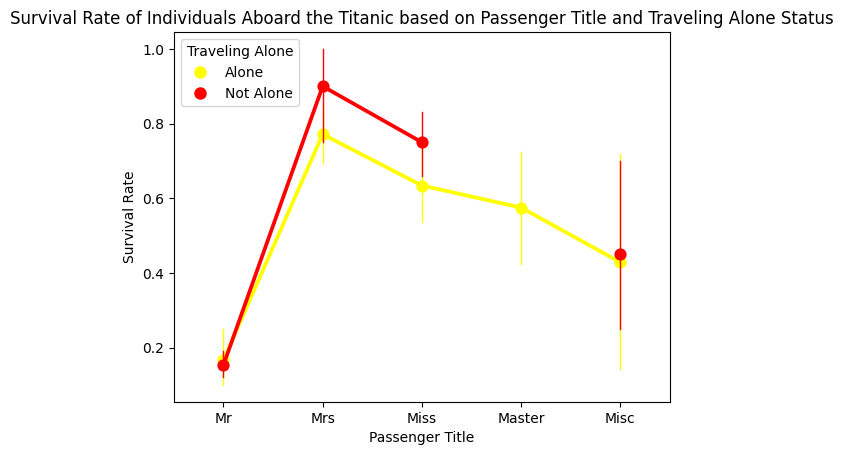

In [31]:
# Data visualization
sns.pointplot(data=data, hue='isAlone', x='Title', y='Survived', palette=['Yellow', 'Red'], errwidth=1)

# Labels and title
plt.xlabel('Passenger Title')
plt.ylabel('Survival Rate')
plt.title('Survival Rate of Individuals Aboard the Titanic based on Passenger Title and Traveling Alone Status')

# Create custom legend
legend_elements = [
    plt.Line2D([0], [0], marker='o', color='w', label='Alone', markerfacecolor='Yellow', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='Not Alone', markerfacecolor='Red', markersize=10)
]
plt.legend(handles=legend_elements, title='Traveling Alone', loc='upper left')

# Show the plot
plt.show()

In [32]:
"""from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=2, weights="uniform")
imputer.fit_transform(train[['Age','Fare']])
train.info()"""

'from sklearn.impute import KNNImputer\nimputer = KNNImputer(n_neighbors=2, weights="uniform")\nimputer.fit_transform(train[[\'Age\',\'Fare\']])\ntrain.info()'

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Survived     891 non-null    int64   
 1   Pclass       891 non-null    int64   
 2   Name         891 non-null    object  
 3   Sex          891 non-null    object  
 4   Age          891 non-null    float64 
 5   SibSp        891 non-null    int64   
 6   Parch        891 non-null    int64   
 7   Fare         891 non-null    float64 
 8   Embarked     891 non-null    object  
 9   Title        891 non-null    object  
 10  Last Name    891 non-null    object  
 11  Family Size  891 non-null    int64   
 12  isAlone      891 non-null    int64   
 13  Fare qcut    891 non-null    category
 14  Age cut      891 non-null    category
dtypes: category(2), float64(2), int64(6), object(5)
memory usage: 92.8+ KB


In [34]:
# Weights and bias
'''data['Pclass'] = data['Pclass'].apply(lambda x: 1 if x == 3 else (3 if x == 1 else x))
data['isAlone'] = data['isAlone'].apply(lambda x: 1 if x == 0 else 0)'''

"data['Pclass'] = data['Pclass'].apply(lambda x: 1 if x == 3 else (3 if x == 1 else x))\ndata['isAlone'] = data['isAlone'].apply(lambda x: 1 if x == 0 else 0)"

In [35]:
# Label Encoding for Age and Fare bins
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

for table in dataset:
    table['Fare Bin'] = label.fit_transform(table['Fare qcut'])
    table['Age Bin'] = label.fit_transform(table['Age cut'])

# One-Hot Encoding
features = ["Pclass", "Sex", "SibSp", "Parch", "Title", "Family Size", "isAlone", "Fare Bin", "Age Bin", "Age", "Embarked", "Fare"]
#features = ["Pclass", "Sex", "SibSp", "Parch", "Title", "Family Size", "isAlone", "Fare Bin", "Age Bin", "Embarked"]
X = pd.get_dummies(data[features])
X_test = pd.get_dummies(test[features])

# Target
y = data["Survived"]
y_test = sub['Survived']

<Axes: >

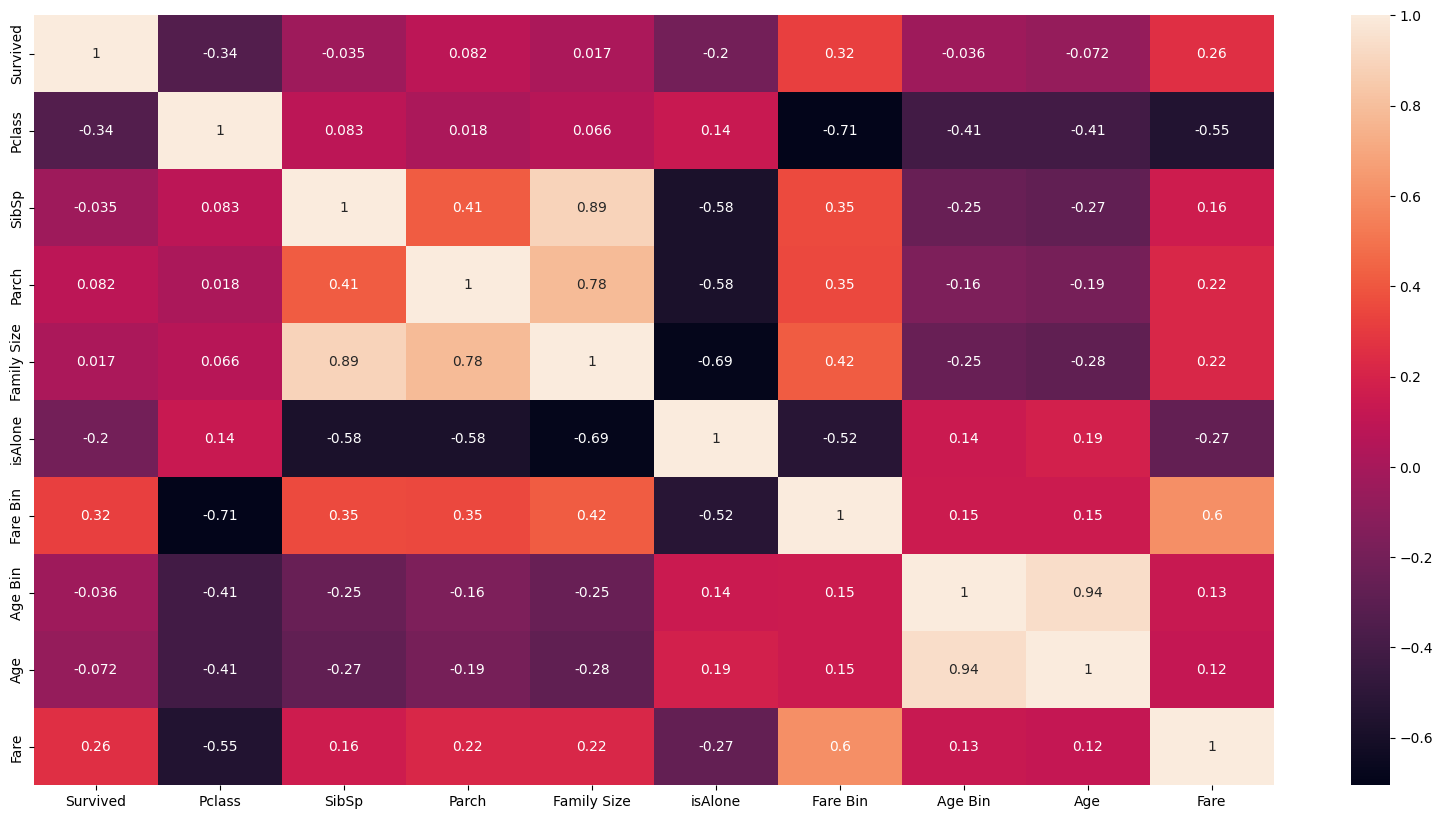

In [36]:
cor = ['Survived'] + features
correlation_matrix = data[cor].corr(numeric_only=True)

# Filter out the columns with categorical values
numerical_features = data[cor].select_dtypes(include=[np.number])
correlation_matrix = numerical_features.corr(numeric_only=True)

plt.figure(figsize=(20,10))
sns.heatmap(correlation_matrix, annot=True)

<Axes: >

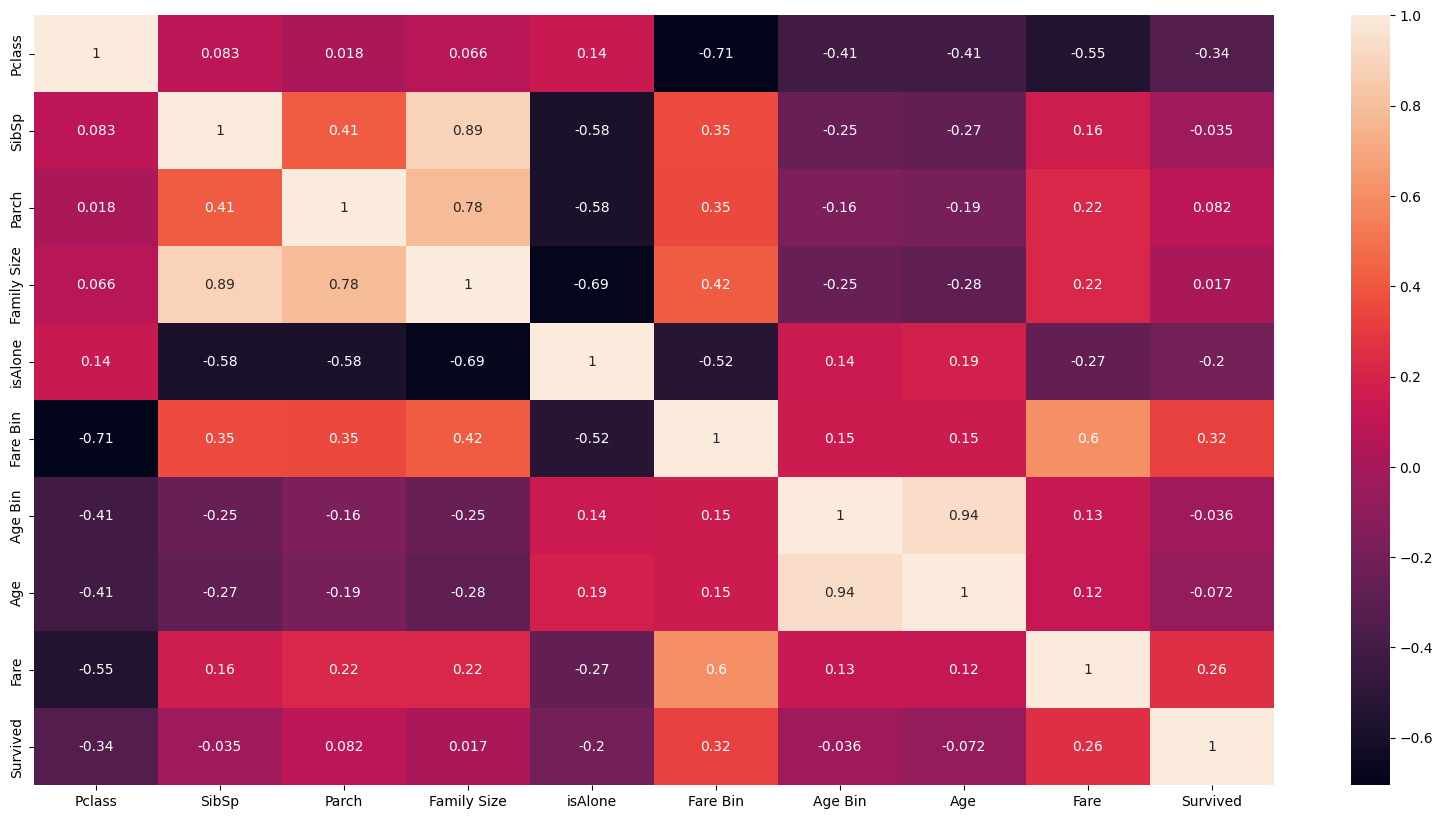

In [37]:
cor = X.copy(deep=True)
cor['Survived'] = data['Survived']
correlation_matrix = cor.corr(numeric_only=True)

# Filter out the columns with categorical values
numerical_features = cor.select_dtypes(include=[np.number])
correlation_matrix = numerical_features.corr(numeric_only=True)

plt.figure(figsize=(20,10))
sns.heatmap(correlation_matrix, annot=True)

In [38]:
X.head()

,Pclass,SibSp,Parch,Family Size,isAlone,Fare Bin,Age Bin,Age,Fare,Sex_female,Sex_male,Title_Master,Title_Misc,Title_Miss,Title_Mr,Title_Mrs,Embarked_C,Embarked_Q,Embarked_S
0,3,1,0,2,0,0,1,22.0,7.2500,False,True,False,False,False,True,False,False,False,True
1,1,1,0,2,0,4,2,38.0,71.2833,True,False,False,False,False,False,True,True,False,False
2,3,0,0,1,1,1,1,26.0,7.9250,True,False,False,False,True,False,False,False,False,True
3,1,1,0,2,0,4,2,35.0,53.1000,True,False,False,False,False,False,True,False,False,True
4,3,0,0,1,1,1,2,35.0,8.0500,False,True,False,False,False,True,False,False,False,True


In [39]:
random_state = 42
classifier = [RandomForestClassifier(random_state = random_state)]

rf_param_grid = {"max_features": [1,3,10],
                "min_samples_split":[2,3,10],
                "min_samples_leaf":[1,3,10],
                "bootstrap":[False],
                "n_estimators":[1000],
                "criterion":["gini"]}

classifier_param = [rf_param_grid]

cv_result = []
best_estimators = []
for i in range(len(classifier)):
    clf = GridSearchCV(classifier[i], param_grid=rf_param_grid, cv = StratifiedKFold(n_splits = 10), scoring = "accuracy", n_jobs = -1,verbose = 1)
    clf.fit(X,y)
    print(clf.best_score_)
    print(clf.best_estimator_)

Fitting 10 folds for each of 27 candidates, totalling 270 fits
0.8395505617977529
RandomForestClassifier(bootstrap=False, max_features=10, min_samples_leaf=10,
                       n_estimators=1000, random_state=42)


In [40]:
model = RandomForestClassifier(bootstrap=False, max_features=10, min_samples_leaf=10,
                       n_estimators=1000, random_state=42)
model.fit(X, y)
predictions = model.predict(X_test)
accuracy_score(y_test, predictions)

0.8923444976076556

In [41]:
model = RandomForestClassifier(n_estimators=1000, max_depth=3, random_state=42)
model.fit(X, y)
predictions = model.predict(X_test)
accuracy_score(y_test, predictions)

0.9593301435406698

In [43]:
sub['Survived'] = predictions
sub.to_csv('submission.csv', index=False)